<h1>Plotting Maps using Basemap</h1>
<h4>Please use the geo_plotting environment</h4>

In [5]:
import os 
import numpy as np
import pandas as pd
import numpy as np

from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from datetime import datetime, timedelta

def get_day_array(date_string = "2018-02-11", days = 9):
    date = datetime.strptime(date_string, "%Y-%m-%d")
    dates = []
    for i in range(days):
        previous_date = date - timedelta(days=i+1)
        dates.append(previous_date.strftime("%Y-%m-%d")) 
    dates.reverse()
    return dates


/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_12797/869942038.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


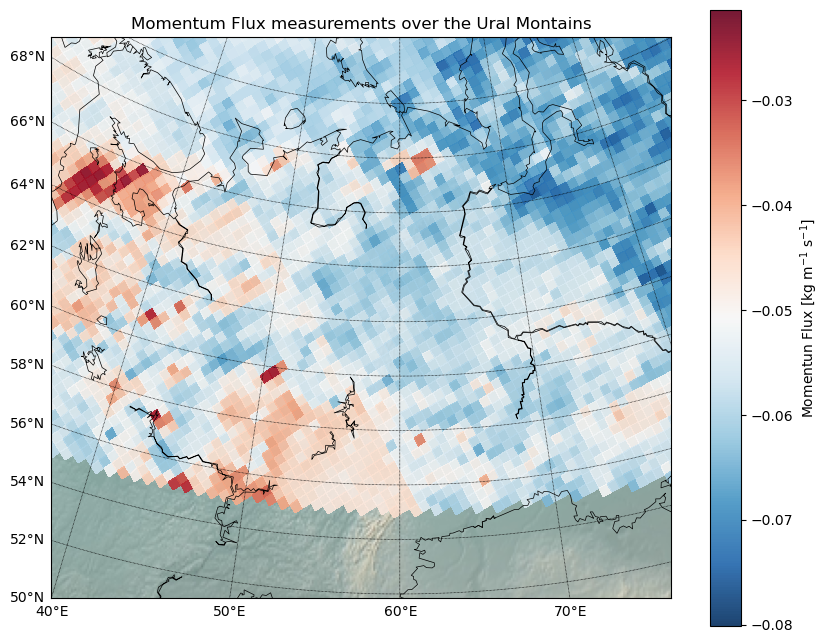

In [6]:
# Momentum Flux over Moountain Areas - Urals (use geo_plotting env)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = np.load('processed_airs_sftp/40_km_grid/30km/mfx/2003-01-17_mfx.npz')['arr_0']
grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

fig = plt.figure(figsize=(10, 8))

m = Basemap(projection='stere', lon_0=60, lat_0=60, llcrnrlat=50, urcrnrlat=70,
            llcrnrlon=40, urcrnrlon=90, resolution='l')

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawparallels(np.arange(50, 71, 2), linewidth=0.5, labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(40, 91, 10), linewidth=0.5, labels=[0, 0, 0, 1])

x, y = m(grid.nh_lon, grid.nh_lat)
m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9)
m.etopo(alpha=0.5)

m.shadedrelief(scale=0.5)

plt.colorbar(label='Momentun Flux [kg m$^{-1}$ s$^{-1}$]')
plt.title('Momentum Flux measurements over the Ural Montains')

plt.show()


<h1>Plot on colourmesh - Urals, mfx</h1>

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_12797/817841039.py:48: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-0.1, vmax=-0.02)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)

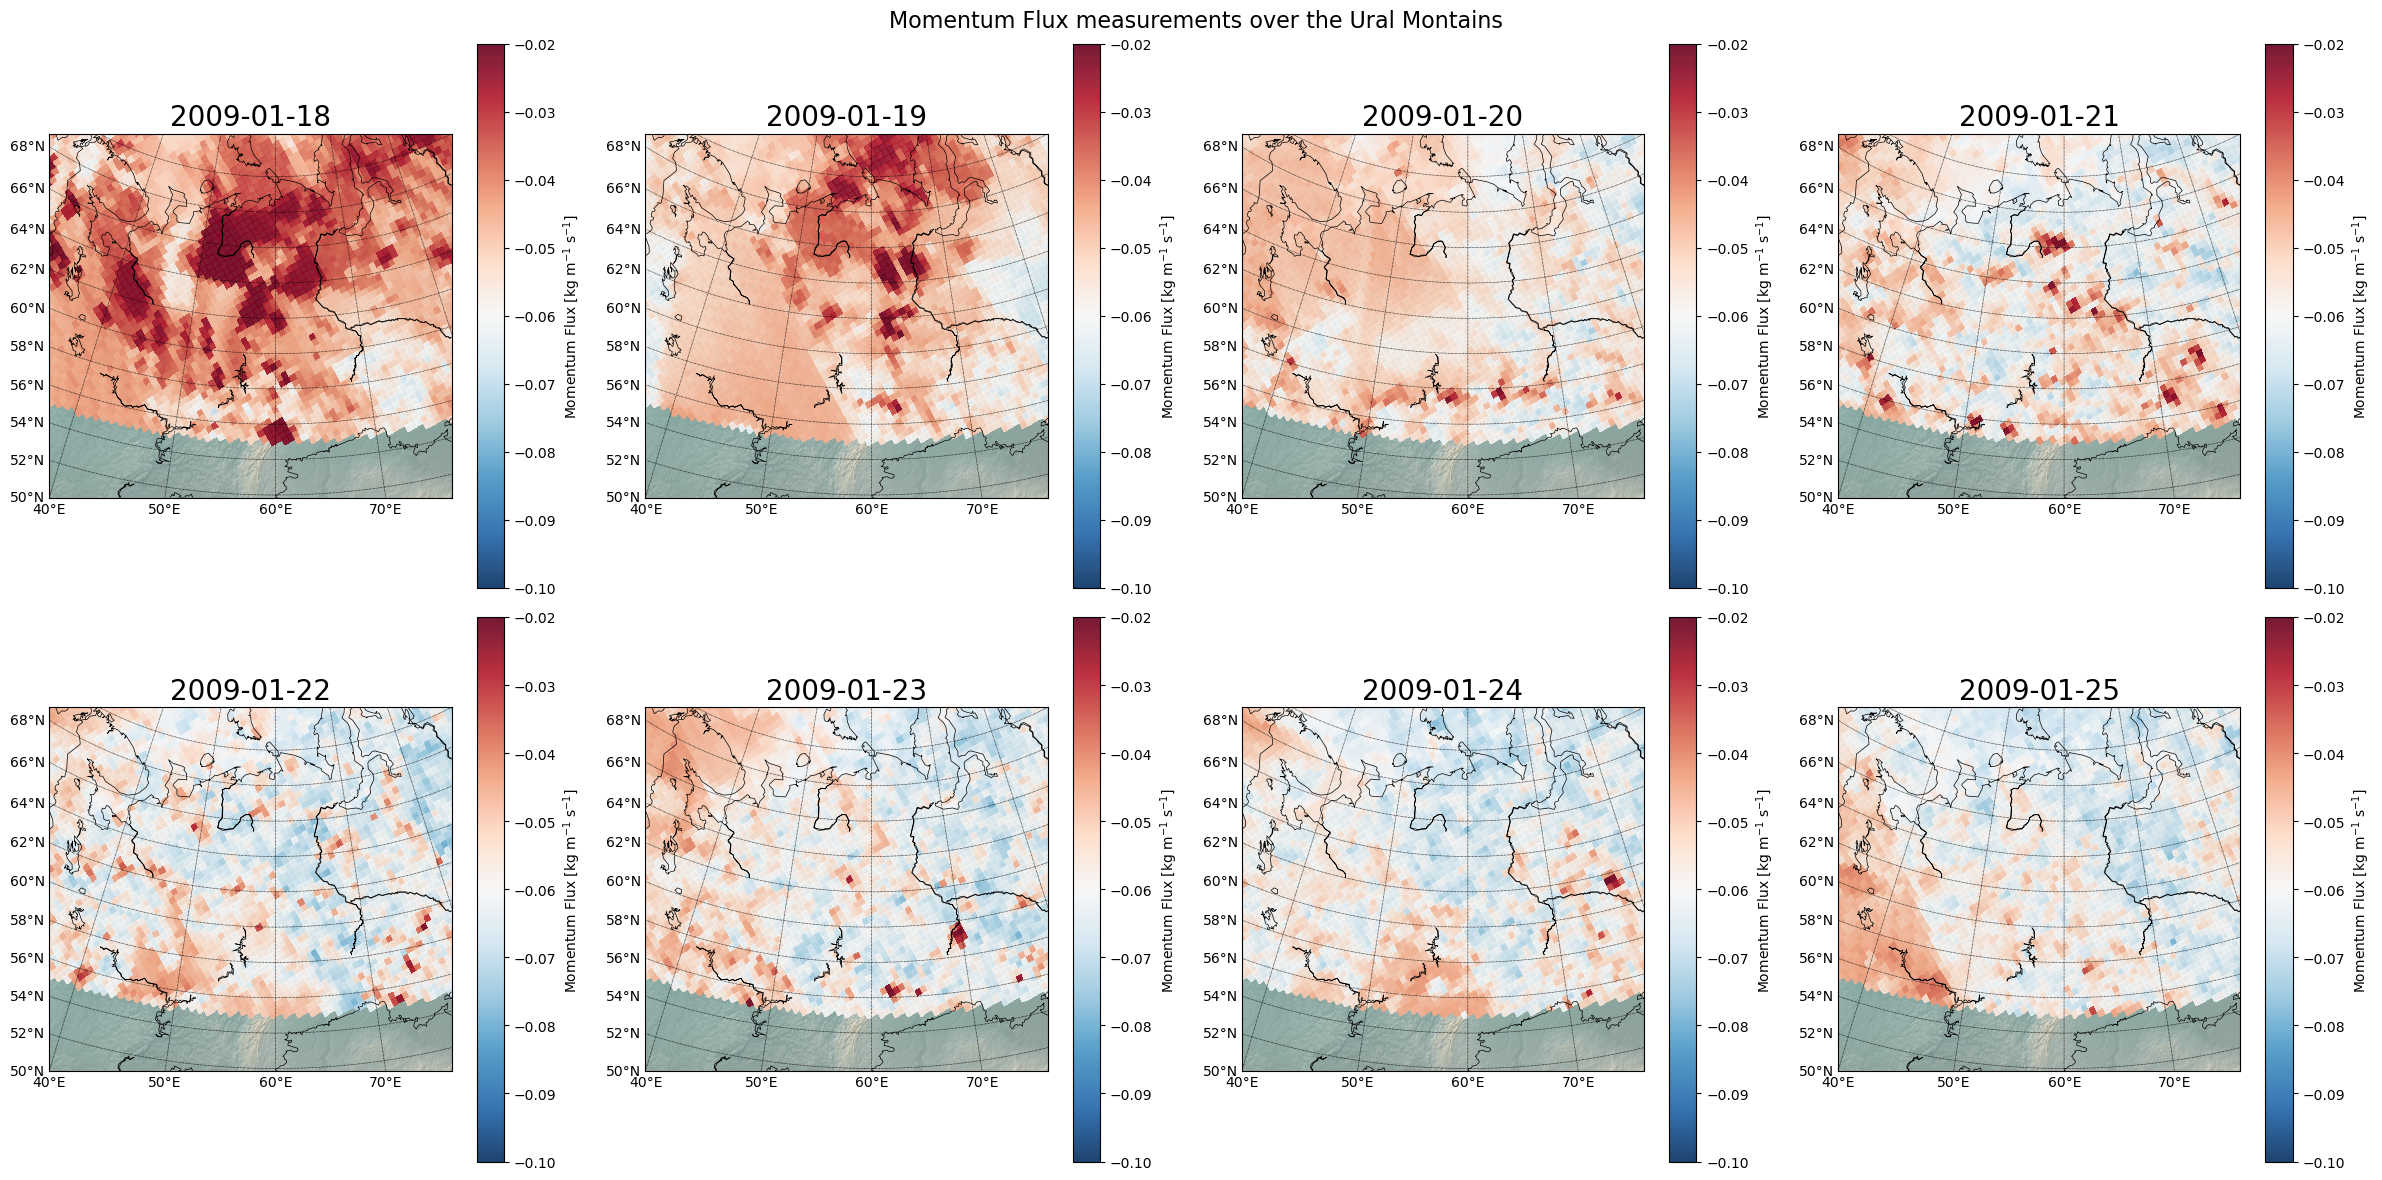

In [33]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data and create grid and wizard objects

data_type = 'mfx'
days = 8
dates = get_day_array(date_string="2009-01-26",days=days)
data_dict = {}

for i in range(days):
    data = np.load(f'processed_airs_sftp/40_km_grid/30km/{data_type}/{dates[i]}_{data_type}.npz')['arr_0']
    data_climatological_mean = np.load(f'climatology/airs/30km/{data_type}/{dates[i][5:]}_daily_average.npz')['arr_0']
    perturbation = data - data_climatological_mean
    data_dict[f"data_{i+1}"] = data


grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

# Set common parameters for the map
map_params = {
    'projection': 'stere',
    'lon_0': 60,
    'lat_0': 60,
    'llcrnrlat': 50,
    'urcrnrlat': 70,
    'llcrnrlon': 40,
    'urcrnrlon': 90,
    'resolution': 'l'
}

# Loop over the subplots and plot the map
data_i = 1

for i, ax in enumerate(axes.flatten()):
    m = Basemap(ax=ax, **map_params)
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.drawparallels(np.arange(50, 71, 2), linewidth=0.5, labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(40, 91, 10), linewidth=0.5, labels=[0, 0, 0, 1])
    x, y = m(grid.nh_lon, grid.nh_lat)
    im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-0.1, vmax=-0.02)
    m.etopo(alpha=0.5)
    m.shadedrelief(scale=0.5)
    ax.set_title(dates[data_i-1])
    # add colorbar with ranges from 
    fig.colorbar(im, ax=ax, label='Momentum Flux [kg m$^{-1}$ s$^{-1}$]', location='right')
    ax.title.set_fontsize(20)

    data_i += 1


plt.suptitle('Momentum Flux measurements over the Ural Montains', fontsize=16)
plt.tight_layout()
plt.show()

<h1>Plot on colourmesh - Urals, mfx perturbation</h1>

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_12797/4233688961.py:53: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-0.025, vmax=0.05)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integer

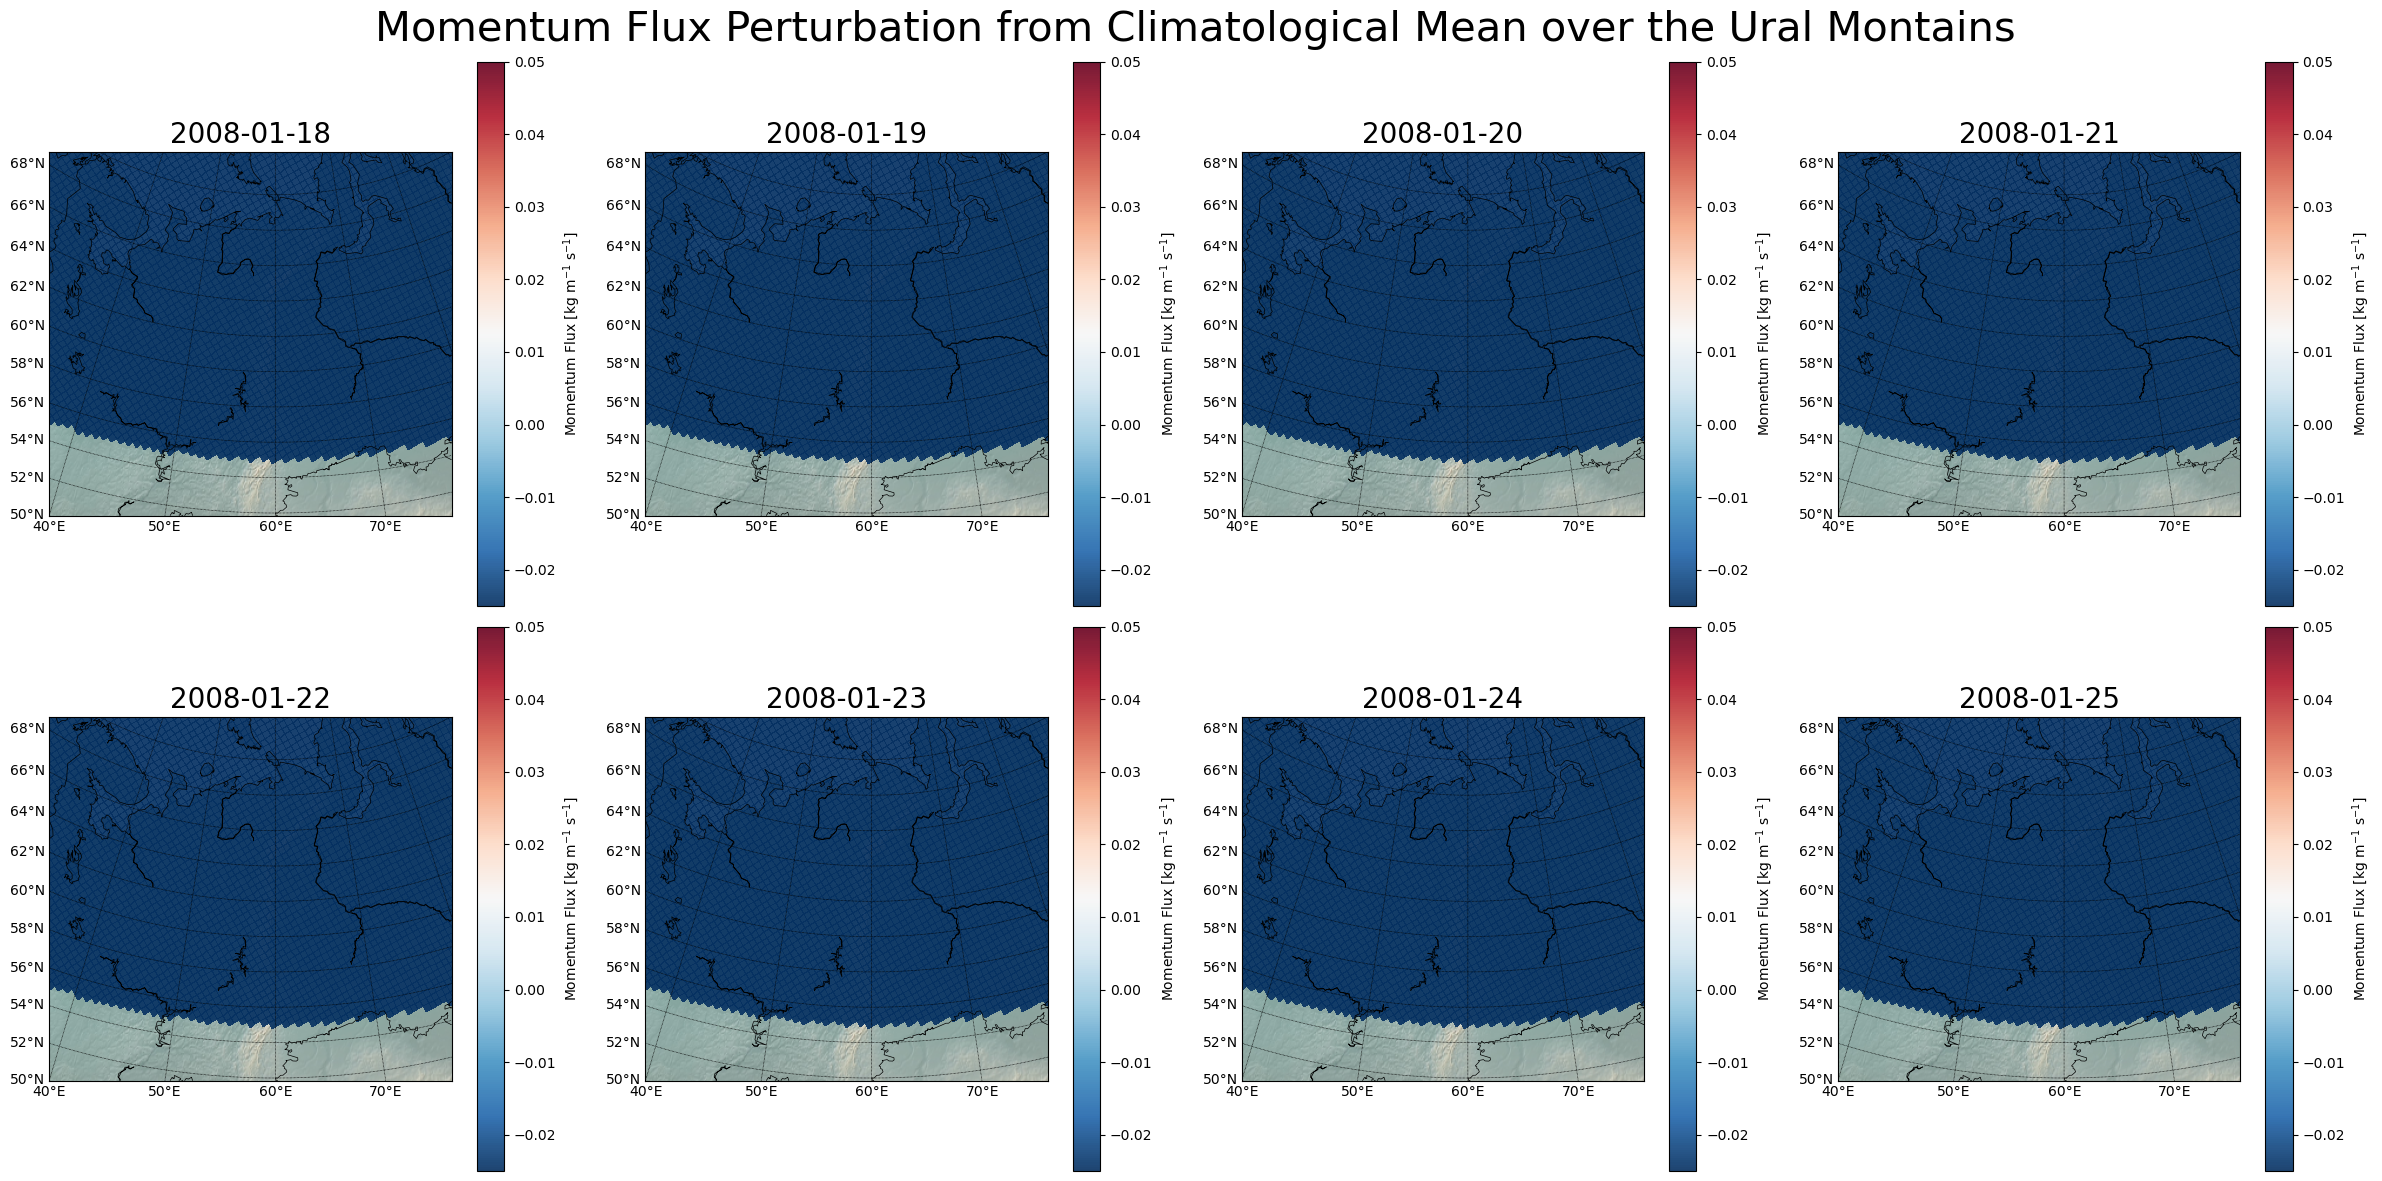

In [42]:
# =================================================================================================
# Plot on colourmesh - Urals, mfx perturbation
# =================================================================================================

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data and create grid and wizard objects

data_type = 'mfx'
days = 8
dates = get_day_array(date_string="2008-01-26",days=days)
data_dict = {}

for i in range(days):
    data = np.load(f'processed_airs_sftp/40_km_grid/30km/{data_type}/{dates[i]}_{data_type}.npz')['arr_0']
    data_climatological_mean = np.load(f'climatology/airs/30km/{data_type}/{dates[i][5:]}_daily_average.npz')['arr_0']
    perturbation = data - data_climatological_mean
    data_dict[f"data_{i+1}"] = data_climatological_mean


grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

# Set common parameters for the map
map_params = {
    'projection': 'stere',
    'lon_0': 60,
    'lat_0': 60,
    'llcrnrlat': 50,
    'urcrnrlat': 70,
    'llcrnrlon': 40,
    'urcrnrlon': 90,
    'resolution': 'l'
}

# Loop over the subplots and plot the map
data_i = 1

for i, ax in enumerate(axes.flatten()):
    m = Basemap(ax=ax, **map_params)
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.drawparallels(np.arange(50, 71, 2), linewidth=0.5, labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(40, 91, 10), linewidth=0.5, labels=[0, 0, 0, 1])
    x, y = m(grid.nh_lon, grid.nh_lat)
    # perturbation  params
    im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-0.025, vmax=0.05)
    m.etopo(alpha=0.5)
    m.shadedrelief(scale=0.5)
    ax.set_title(dates[data_i-1])
    # add colorbar with ranges from 
    fig.colorbar(im, ax=ax, label='Momentum Flux [kg m$^{-1}$ s$^{-1}$]', location='right')
    data_i += 1
    # increase label size
    ax.title.set_fontsize(20)
    


plt.suptitle('Momentum Flux Perturbation from Climatological Mean over the Ural Montains', fontsize=30)
plt.tight_layout()
plt.show()

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_12797/2243927759.py:55: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-0.1, vmax=0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C

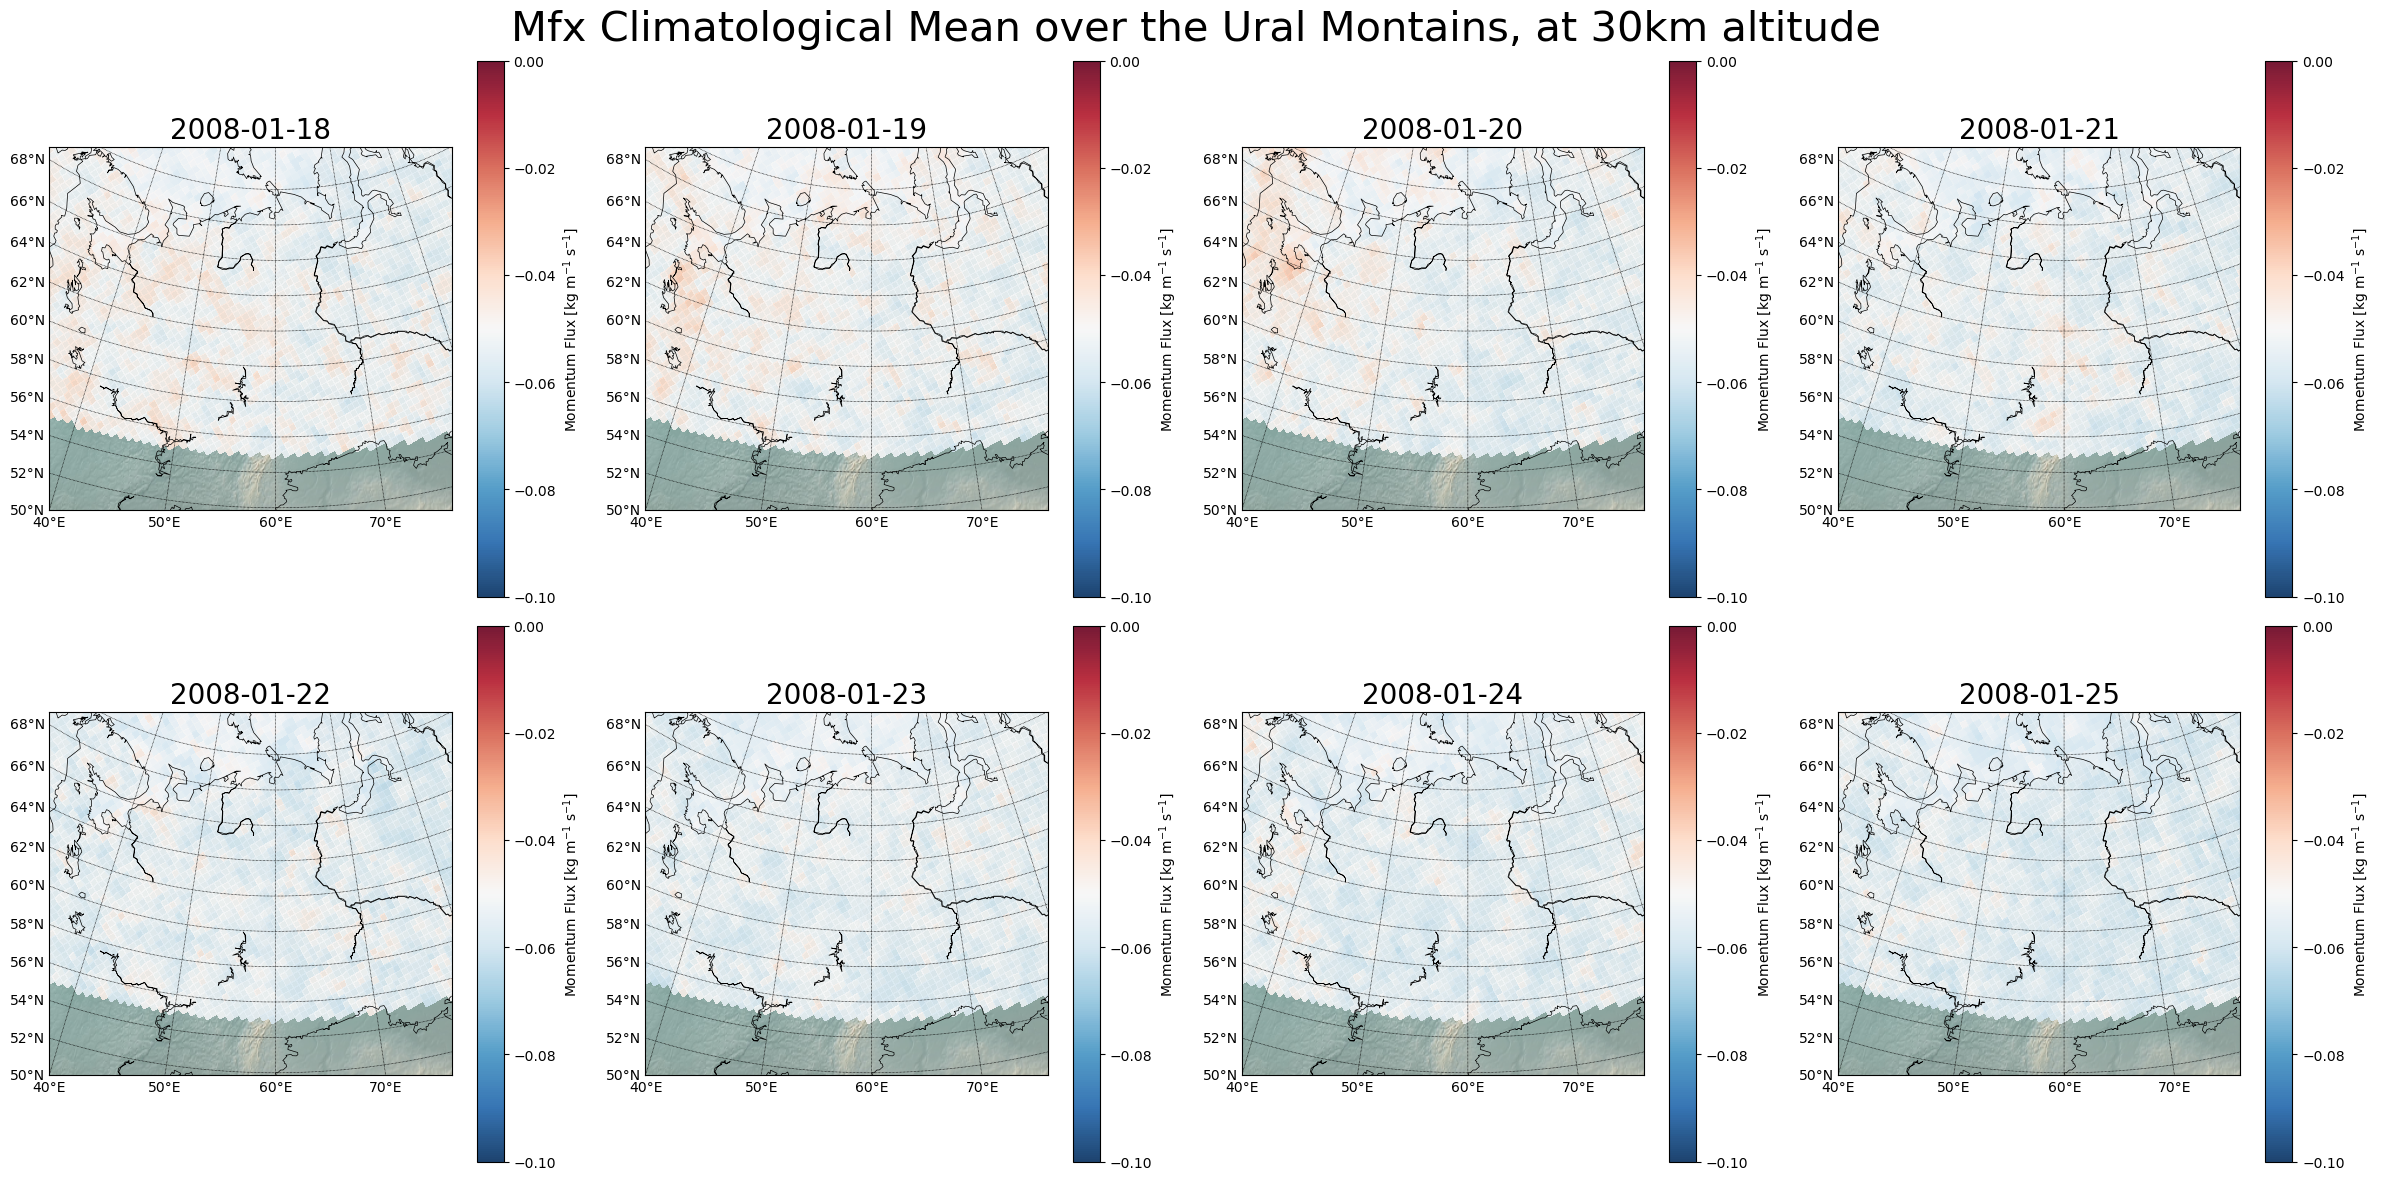

In [43]:
# =================================================================================================
# Plot on colourmesh - Urals, mfx perturbation
# =================================================================================================

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data and create grid and wizard objects

data_type = 'mfx'
days = 8
dates = get_day_array(date_string="2008-01-26",days=days)
data_dict = {}

for i in range(days):
    data = np.load(f'processed_airs_sftp/40_km_grid/30km/{data_type}/{dates[i]}_{data_type}.npz')['arr_0']
    data_climatological_mean = np.load(f'climatology/airs/30km/{data_type}/{dates[i][5:]}_daily_average.npz')['arr_0']
    perturbation = data - data_climatological_mean
    data_dict[f"data_{i+1}"] = data_climatological_mean


grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

# Set common parameters for the map
map_params = {
    'projection': 'stere',
    'lon_0': 60,
    'lat_0': 60,
    'llcrnrlat': 50,
    'urcrnrlat': 70,
    'llcrnrlon': 40,
    'urcrnrlon': 90,
    'resolution': 'l'
}

# Loop over the subplots and plot the map
data_i = 1

for i, ax in enumerate(axes.flatten()):
    m = Basemap(ax=ax, **map_params)
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.drawparallels(np.arange(50, 71, 2), linewidth=0.5, labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(40, 91, 10), linewidth=0.5, labels=[0, 0, 0, 1])
    x, y = m(grid.nh_lon, grid.nh_lat)
    # perturbation  params
    # im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-0.025, vmax=0.05)
    # climatological mean params
    im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-0.1, vmax=0)
    m.etopo(alpha=0.5)
    m.shadedrelief(scale=0.5)
    ax.set_title(dates[data_i-1])
    # add colorbar with ranges from 
    fig.colorbar(im, ax=ax, label='Momentum Flux [kg m$^{-1}$ s$^{-1}$]', location='right')
    data_i += 1
    # increase label size
    ax.title.set_fontsize(20)
    


plt.suptitle('Mfx Climatological Mean over the Ural Montains, at 30km altitude', fontsize=30)
plt.tight_layout()
plt.show()

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_55974/3762866329.py:63: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-1.8, vmax=1.8)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to

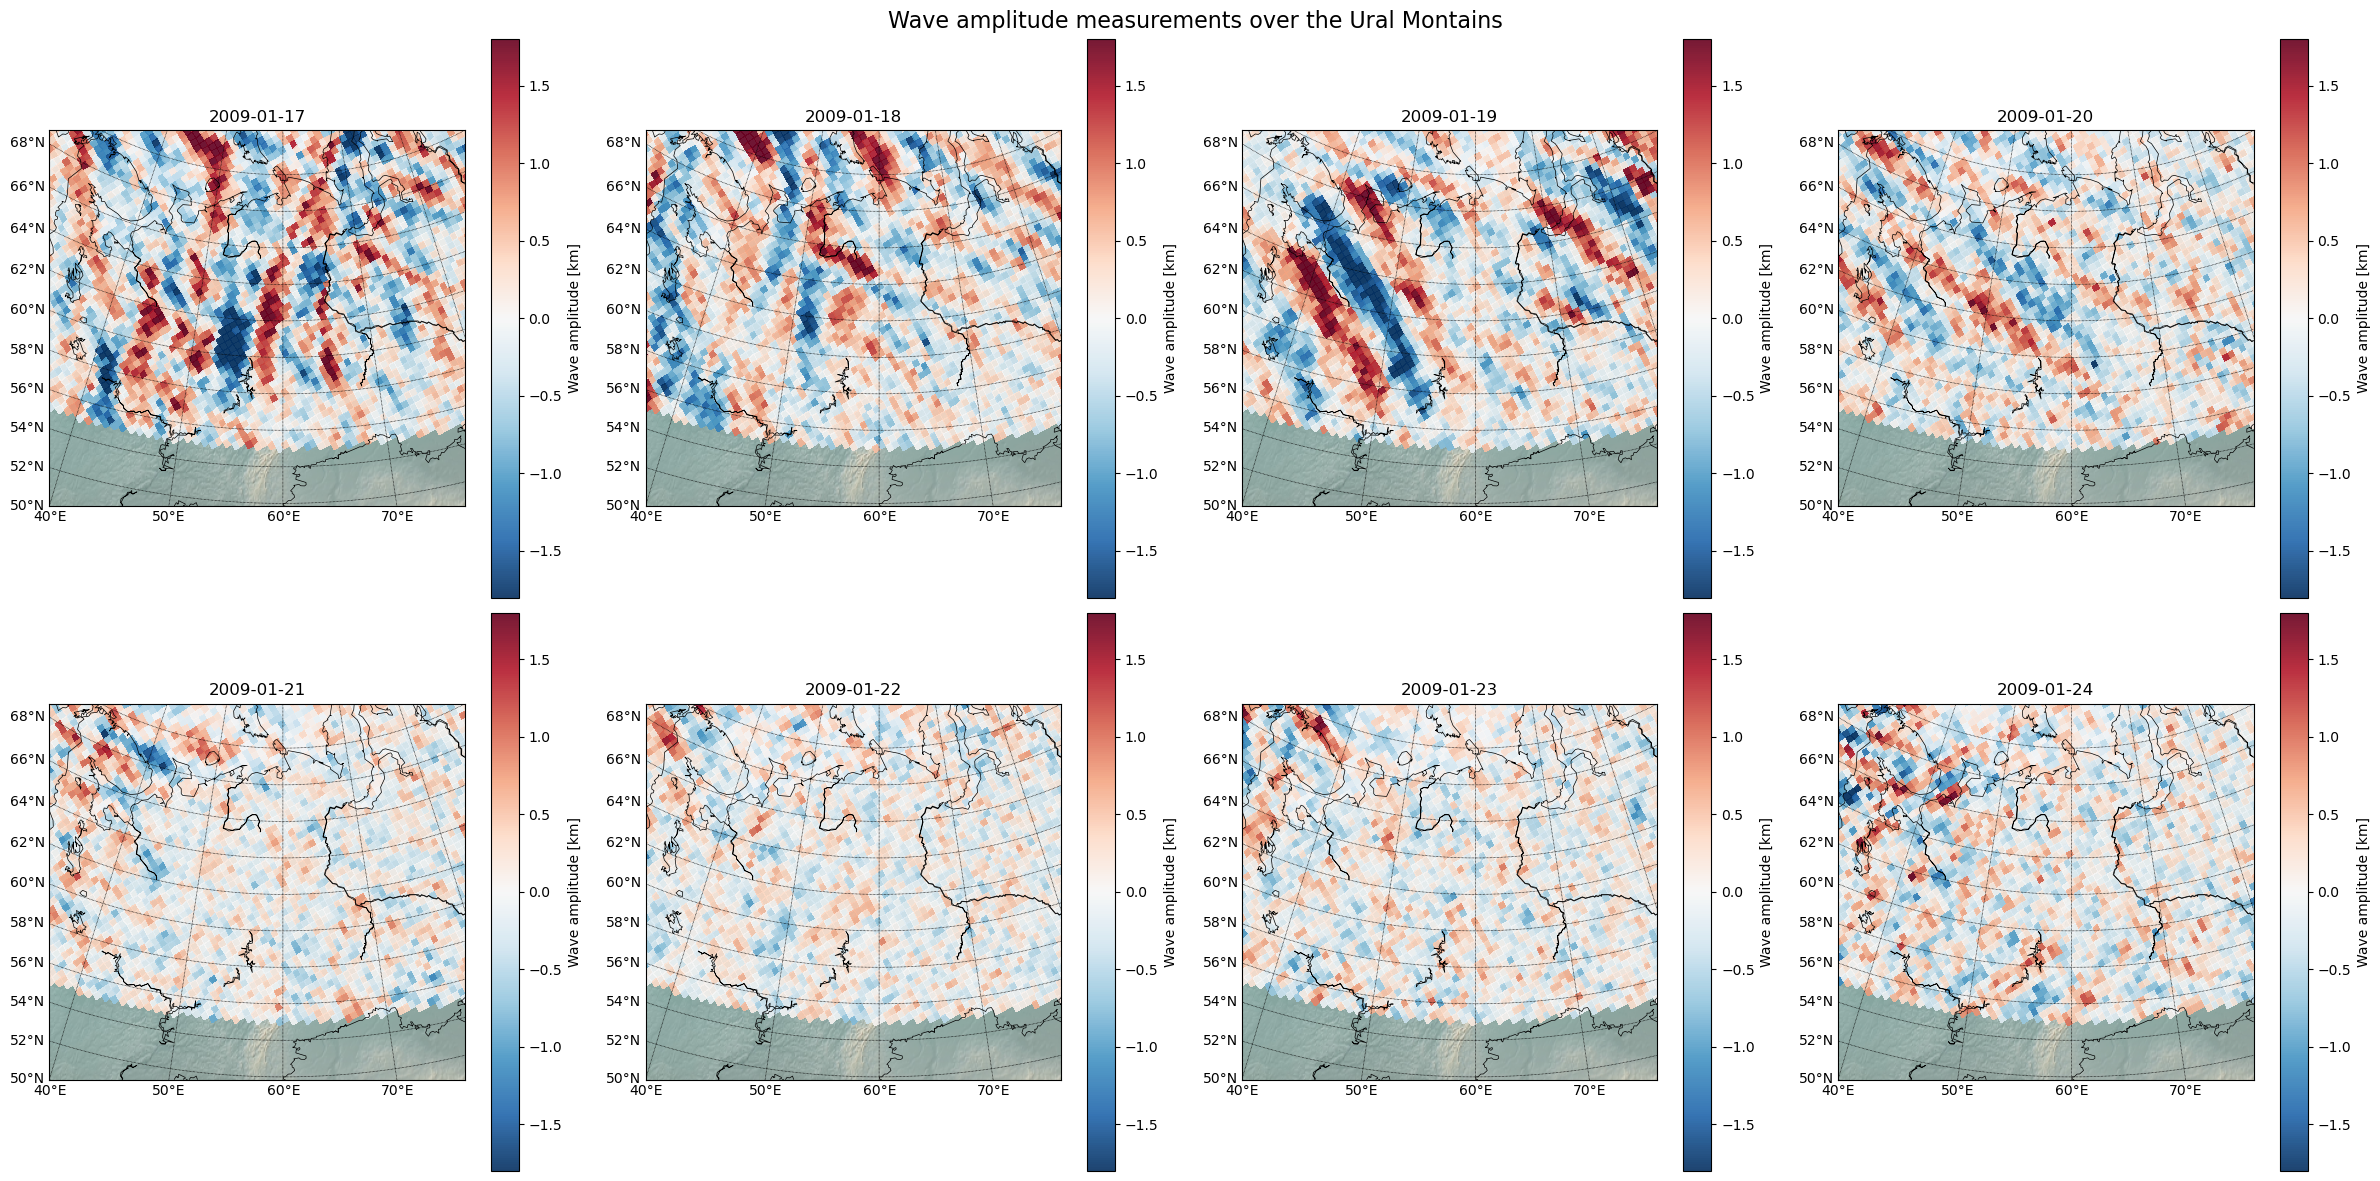

In [20]:
# =================================================================================================
# Plot on colourmesh - Urals, a
# =================================================================================================

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data and create grid and wizard objects
data_type = 'a'

data_type = 'mfx'
days = 8
dates = get_day_array(date_string="2009-01-26",days=days)
data_dict = {}

for i in range(days):
    data = np.load(f'processed_airs_sftp/40_km_grid/30km/{data_type}/{dates[i]}_{data_type}.npz')['arr_0']
    data_dict[f"data_{i+1}"] = data
    

grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

# Set common parameters for the map
map_params = {
    'projection': 'stere',
    'lon_0': 60,
    'lat_0': 60,
    'llcrnrlat': 50,
    'urcrnrlat': 70,
    'llcrnrlon': 40,
    'urcrnrlon': 90,
    'resolution': 'l'
}

# Loop over the subplots and plot the map
data_i = 1

for i, ax in enumerate(axes.flatten()):
    data = data_dict[f'data_{data_i}']

    m = Basemap(ax=ax, **map_params)
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.drawparallels(np.arange(50, 71, 2), linewidth=0.5, labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(40, 91, 10), linewidth=0.5, labels=[0, 0, 0, 1])
    x, y = m(grid.nh_lon, grid.nh_lat)
    im = m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-1.8, vmax=1.8)
    m.etopo(alpha=0.5)
    m.shadedrelief(scale=0.5)
    m.quiver(x, y, 
            data, data, scale = 10,latlon=True)

    ax.set_title(dates[data_i-1])
    # add colorbar with ranges from 
    fig.colorbar(im, ax=ax, label='Wave amplitude [km]', location='right')
    data_i += 1


plt.suptitle('Wave amplitude measurements over the Ural Montains', fontsize=16)
plt.tight_layout()
plt.show()